<a href="https://colab.research.google.com/github/Deekshetha0211/Suven-Consultants-Technology-Online-Internship/blob/main/Performing_Analysis_of_Meteorological_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data=pd.read_csv("/content/drive/MyDrive/weatherHistory.csv")
data.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [8]:
data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [9]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [10]:
data.isnull().sum(axis = 0)

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [11]:
df=data[['Formatted Date','Apparent Temperature (C)','Humidity']]
df.head(10)

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83
5,2006-04-01 05:00:00.000 +0200,7.111111,0.85
6,2006-04-01 06:00:00.000 +0200,5.522222,0.95
7,2006-04-01 07:00:00.000 +0200,6.527778,0.89
8,2006-04-01 08:00:00.000 +0200,10.822222,0.82
9,2006-04-01 09:00:00.000 +0200,13.772222,0.72


In [12]:
df['Formatted Date']=pd.to_datetime(df['Formatted Date'],utc=True)
df=df.set_index('Formatted Date')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df1=df[['Apparent Temperature (C)','Humidity']].resample('MS').mean()
df1

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-01 00:00:00+00:00,21.383094,0.674046
2016-09-01 00:00:00+00:00,18.355833,0.688833
2016-10-01 00:00:00+00:00,8.923947,0.799906


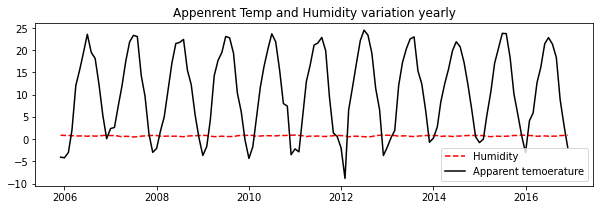

In [15]:
plt.figure(figsize= (10,3))
plt.plot(df1['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(df1['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('Appenrent Temp and Humidity variation yearly')
plt.legend(loc= 0)

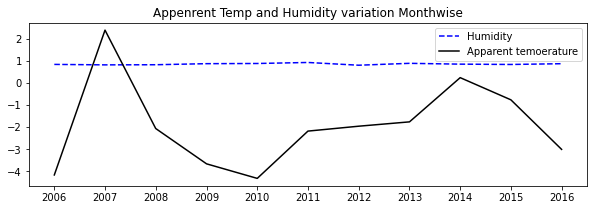

In [16]:
jan=df1[df1.index.month ==1]
plt.figure(figsize= (10,3))
plt.plot(jan['Humidity'],label = 'Humidity', color = 'blue', linestyle = 'dashed')
plt.plot(jan['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('Appenrent Temp and Humidity variation Monthwise')
plt.legend(loc= 0)

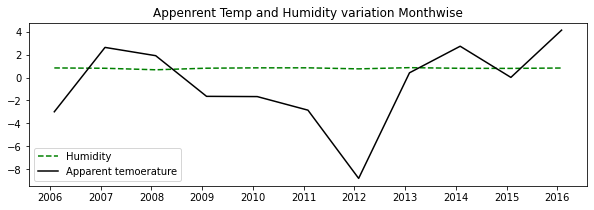

In [18]:
feb=df1[df1.index.month ==2]
plt.figure(figsize= (10,3))
plt.plot(feb['Humidity'],label = 'Humidity', color = 'green', linestyle = 'dashed')
plt.plot(feb['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('Appenrent Temp and Humidity variation Monthwise')
plt.legend(loc= 0)

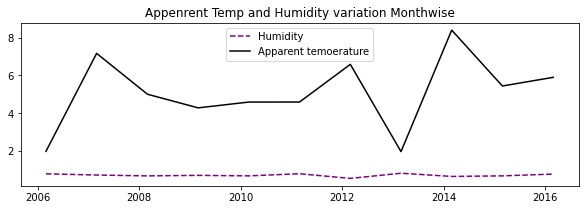

In [21]:
mar=df1[df1.index.month ==3]
plt.figure(figsize= (10,3))
plt.plot(mar['Humidity'],label = 'Humidity', color = 'purple', linestyle = 'dashed')
plt.plot(mar['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('Appenrent Temp and Humidity variation Monthwise')
plt.legend(loc= 0)

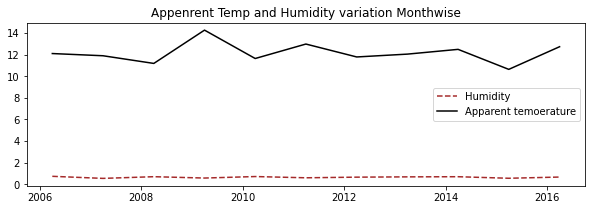

In [22]:
apr=df1[df1.index.month ==4]
plt.figure(figsize= (10,3))
plt.plot(apr['Humidity'],label = 'Humidity', color = 'brown', linestyle = 'dashed')
plt.plot(apr['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('Appenrent Temp and Humidity variation Monthwise')
plt.legend(loc= 0)

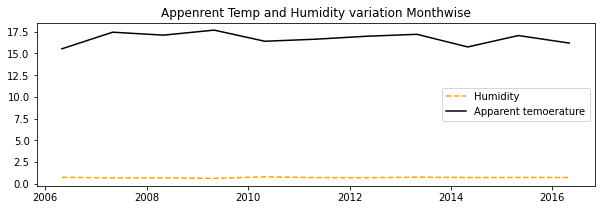

In [23]:
may=df1[df1.index.month ==5]
plt.figure(figsize= (10,3))
plt.plot(may['Humidity'],label = 'Humidity', color = 'orange', linestyle = 'dashed')
plt.plot(may['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('Appenrent Temp and Humidity variation Monthwise')
plt.legend(loc= 0)

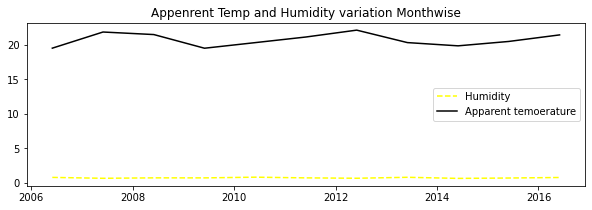

In [26]:
jun=df1[df1.index.month ==6]
plt.figure(figsize= (10,3))
plt.plot(jun['Humidity'],label = 'Humidity', color = 'yellow', linestyle = 'dashed')
plt.plot(jun['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('Appenrent Temp and Humidity variation Monthwise')
plt.legend(loc= 0)

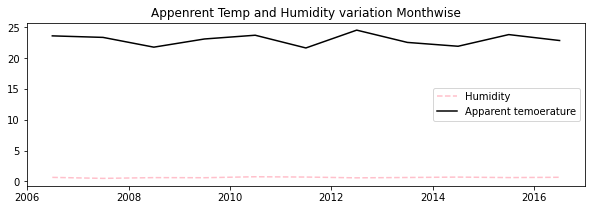

In [27]:
jul=df1[df1.index.month ==7]
plt.figure(figsize= (10,3))
plt.plot(jul['Humidity'],label = 'Humidity', color = 'pink', linestyle = 'dashed')
plt.plot(jul['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('Appenrent Temp and Humidity variation Monthwise')
plt.legend(loc= 0)

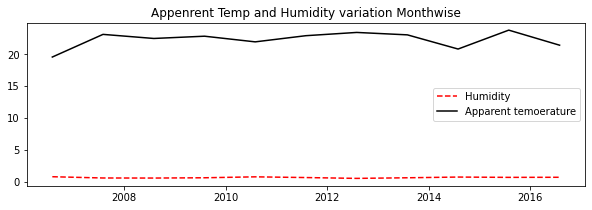

In [28]:
aug=df1[df1.index.month ==8]
plt.figure(figsize= (10,3))
plt.plot(aug['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(aug['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('Appenrent Temp and Humidity variation Monthwise')
plt.legend(loc= 0)

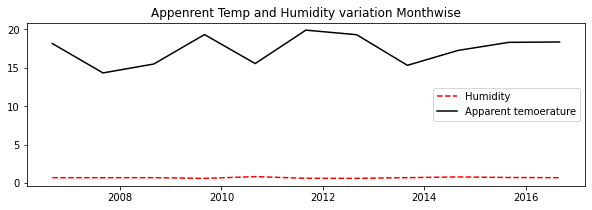

In [29]:
sep=df1[df1.index.month ==9]
plt.figure(figsize= (10,3))
plt.plot(sep['Humidity'],label = 'Humidity', color = 'red', linestyle = 'dashed')
plt.plot(sep['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('Appenrent Temp and Humidity variation Monthwise')
plt.legend(loc= 0)

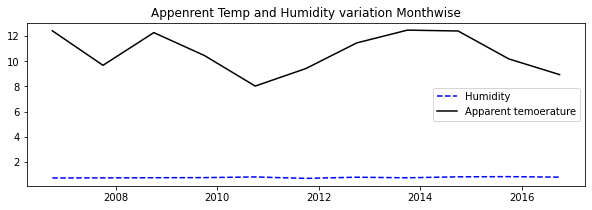

In [30]:
octo=df1[df1.index.month ==10]
plt.figure(figsize= (10,3))
plt.plot(octo['Humidity'],label = 'Humidity', color = 'blue', linestyle = 'dashed')
plt.plot(octo['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('Appenrent Temp and Humidity variation Monthwise')
plt.legend(loc= 0)

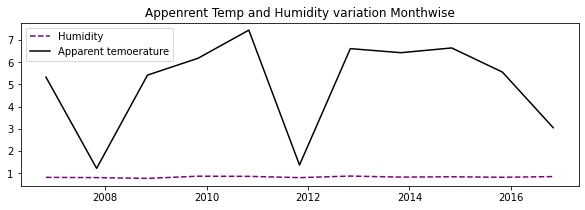

In [31]:
nov=df1[df1.index.month ==11]
plt.figure(figsize= (10,3))
plt.plot(nov['Humidity'],label = 'Humidity', color = 'purple', linestyle = 'dashed')
plt.plot(nov['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('Appenrent Temp and Humidity variation Monthwise')
plt.legend(loc= 0)

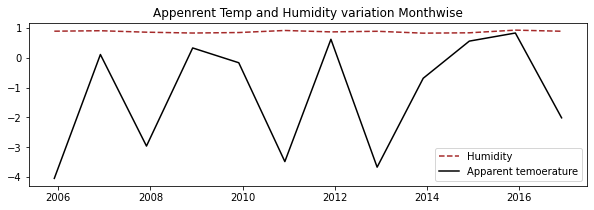

In [32]:
dec=df1[df1.index.month ==12]
plt.figure(figsize= (10,3))
plt.plot(dec['Humidity'],label = 'Humidity', color = 'brown', linestyle = 'dashed')
plt.plot(dec['Apparent Temperature (C)'], label = 'Apparent temoerature', color= 'black')
plt.title('Appenrent Temp and Humidity variation Monthwise')
plt.legend(loc= 0)

In [33]:
a=df1['Apparent Temperature (C)']
b=df1['Humidity']
test=stats.ttest_rel(a,b)
pvalue=test[1]
print(pvalue)

6.686806828886333e-24


In [34]:
if pvalue>0.05:
    print("Accept Null Hypothesis")
else:
    print("Reject Null Hypothesis")

Reject Null Hypothesis
